In [1]:
pip install -U scikit-fuzzy

     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     - -------------------------------------- 30.7/994.0 kB ? eta -:--:--
     -- ---------------------------------- 61.4/994.0 kB 656.4 kB/s eta 0:00:02
     -- ---------------------------------- 61.4/994.0 kB 656.4 kB/s eta 0:00:02
     --- --------------------------------- 92.2/994.0 kB 581.0 kB/s eta 0:00:02
     --- --------------------------------- 92.2/994.0 kB 581.0 kB/s eta 0:00:02
     ----- ------------------------------ 143.4/994.0 kB 607.9 kB/s eta 0:00:02
     ------- ---------------------------- 194.6/994.0 kB 620.6 kB/s eta 0:00:02
     ------- ---------------------------- 204.8/994.0 kB 565.6 kB/s eta 0:00:02
     --------- -------------------------- 256.0/994.0 kB 684.6 kB/s eta 0:00:02
     ----------- ------------------------ 327.7/994.0 kB 752.2 kB/s

In [24]:
import numpy as np
from skfuzzy import control as ctrl
from skfuzzy import membership as mf

In [46]:
# Define input variables
data_redundancy = ctrl.Antecedent(np.arange(0, 101, 1), 'Data_Redundancy')
degradation_level = ctrl.Antecedent(np.arange(0, 101, 1), 'Degradation_Level')
error_history = ctrl.Antecedent(np.arange(0, 101, 1), 'Error_History')
#Define output variable
error_likelihood = ctrl.Consequent(np.arange(0, 101, 1), 'Error_Likelihood')

### Membership functions definitions for input and output variables

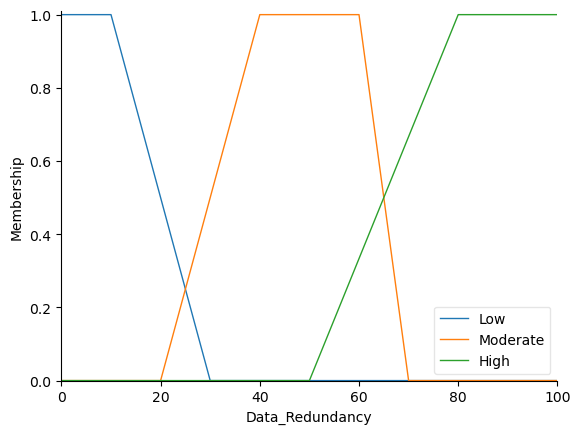

In [47]:
data_redundancy['Low'] = mf.trapmf(data_redundancy.universe, [0, 0, 10, 30])  # Very wide 'low' range for strong emphasis
data_redundancy['Moderate'] = mf.trapmf(data_redundancy.universe, [20, 40, 60, 70])
data_redundancy['High'] = mf.trapmf(data_redundancy.universe, [50, 80, 100, 100])  # Wide 'high' range for sensitivity

data_redundancy.view()

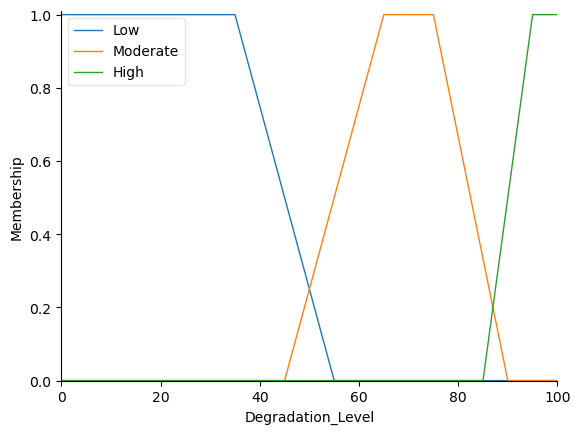

In [48]:
degradation_level['Low'] = mf.trapmf(degradation_level.universe, [0, 0, 35, 55])  # More balanced ranges
degradation_level['Moderate'] = mf.trapmf(degradation_level.universe, [45, 65, 75, 90])
degradation_level['High'] = mf.trapmf(degradation_level.universe, [85, 95, 100, 100])

degradation_level.view()

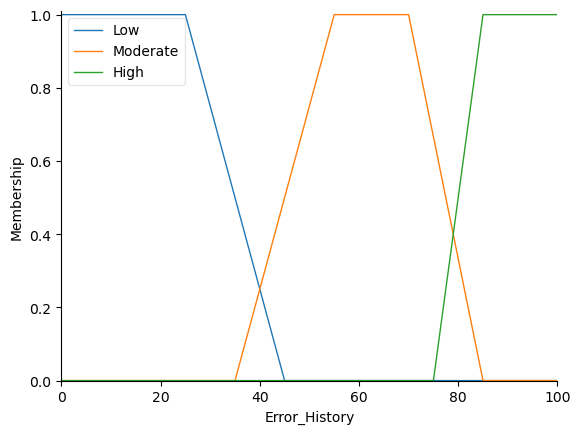

In [49]:
error_history['Low'] = mf.trapmf(error_history.universe, [0, 0, 25, 45])  # Wider 'low' range for secondary emphasis
error_history['Moderate'] = mf.trapmf(error_history.universe, [35, 55, 70, 85])
error_history['High'] = mf.trapmf(error_history.universe, [75, 85, 100, 100])

error_history.view()

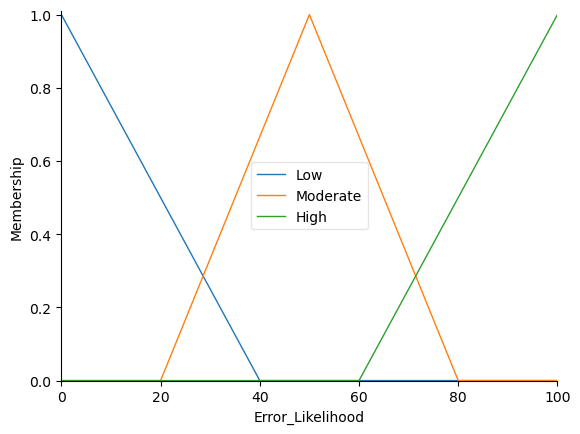

In [50]:
error_likelihood['Low'] = mf.trimf(error_likelihood.universe, [0, 0, 40])
error_likelihood['Moderate'] = mf.trimf(error_likelihood.universe, [20, 50, 80])
error_likelihood['High'] = mf.trimf(error_likelihood.universe, [60, 100, 100])

error_likelihood.view()

### Fuzzy Rules

In [51]:
#fuzzy rules (prioritizing data redundancy, giving secondary priority to error history, and covering various scenarios)
rule1 = ctrl.Rule(data_redundancy['Low'], error_likelihood['High'])  # Strong emphasis on low redundancy
rule2 = ctrl.Rule(error_history['High'], error_likelihood['High'])  # Direct impact of high error history
rule3 = ctrl.Rule(data_redundancy['Moderate'] & (degradation_level['High'] | error_history['Moderate']), error_likelihood['High'])
rule4 = ctrl.Rule(data_redundancy['Moderate'] & degradation_level['Moderate'] & error_history['Low'], error_likelihood['Moderate'])
rule5 = ctrl.Rule(data_redundancy['High'] & degradation_level['Low'] & error_history['Low'], error_likelihood['Low'])  # Ideal scenario
rule6 = ctrl.Rule(data_redundancy['High'] & degradation_level['Moderate'] & error_history['Low'], error_likelihood['Low'])
rule7 = ctrl.Rule(data_redundancy['High'] & degradation_level['Low'] & error_history['Moderate'], error_likelihood['Low'])
rule8 = ctrl.Rule(data_redundancy['High'] & degradation_level['Moderate'] & error_history['Moderate'], error_likelihood['Moderate'])
rule9 = ctrl.Rule(data_redundancy['High'] & degradation_level['Low'], error_likelihood['Low'])  # High redundancy buffer
rule10 = ctrl.Rule(degradation_level['High'] & error_history['High'], error_likelihood['High'])
rule11 = ctrl.Rule(degradation_level['High'] & error_history['Moderate'], error_likelihood['Moderate'])
rule12 = ctrl.Rule(degradation_level['Moderate'] & error_history['High'], error_likelihood['Moderate'])
rule13 = ctrl.Rule(degradation_level['High'], error_likelihood['Moderate'])  # Default for high degradation
rule14 = ctrl.Rule(data_redundancy['Moderate'], error_likelihood['Moderate'])  # Default for moderate redundancy
rule15 = ctrl.Rule(error_history['Moderate'], error_likelihood['Low'])  # Default for moderate error history


# Append rules to a list
rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15]

# Create control system
error_ctrl = ctrl.ControlSystem(rules)
error_simulation = ctrl.ControlSystemSimulation(error_ctrl)

### User input Handling

In [52]:
while True:
    try:
        data_redundancy_input = int(input("Enter data redundancy level (0-100): "))
        if 0 <= data_redundancy_input <= 100:
            break
        else:
            print("Invalid input. Please enter a value between 0 and 100.")
    except ValueError:
        print("Invalid input. Please enter an integer value.")

while True:
    try:
        degradation_level_input = int(input("Enter degradation level (0-100): "))
        if 0 <= degradation_level_input <= 100:
            break
        else:
            print("Invalid input. Please enter a value between 0 and 100.")
    except ValueError:
        print("Invalid input. Please enter an integer value.")

while True:
    try:
        error_history_input = int(input("Enter error history (0-100): "))
        if 0 <= error_history_input <= 100:
            break
        else:
            print("Invalid input. Please enter a value between 0 and 100.")
    except ValueError:
        print("Invalid input. Please enter an integer value.")

# Set input values based on user input
error_simulation.input['Data_Redundancy'] = data_redundancy_input
error_simulation.input['Degradation_Level'] = degradation_level_input
error_simulation.input['Error_History'] = error_history_input

# Compute the output
error_simulation.compute()

# Print the error likelihood percentage and message
error_likelihood_percentage = error_simulation.output['Error_Likelihood']
error_likelihood_message = "Error likelihood: " + str(error_likelihood_percentage) + "%"

if error_likelihood_percentage <= 40:
    error_likelihood_message += " (Low)"
elif error_likelihood_percentage <= 70:
    error_likelihood_message += " (Medium)"
else:
    error_likelihood_message += " (High)"

print(error_likelihood_message)



Error likelihood: 53.46682778065483% (Medium)


### Test cases

In [53]:
# Test cases
test_cases = [
    (80, 20, 10), (90, 50, 70), (95, 80, 90), (75, 30, 40), (85, 60, 50),
    (40, 10, 30), (50, 40, 60), (60, 70, 80), (35, 20, 50), (45, 50, 70),
    (10, 30, 80), (20, 60, 90), (5, 40, 70), (15, 50, 80), (25, 60, 90),
    (50, 70, 10), (30, 20, 80), (80, 10, 50), (65, 40, 30), (40, 80, 60)
]

# Run simulations for each test case and display results
for i, j, k in test_cases:
    error_simulation.input['Data_Redundancy'] = i
    error_simulation.input['Degradation_Level'] = j
    error_simulation.input['Error_History'] = k
    error_simulation.compute()

    error_likelihood = error_simulation.output['Error_Likelihood']
    print(f"Data Redundancy: {data_redundancy}, Degradation Level: {degradation_level}, Error History: {error_history}")
    print(f"Error Likelihood: {error_likelihood:.2f}")
    print("-" * 50)

Data Redundancy: Antecedent: Data_Redundancy, Degradation Level: Antecedent: Degradation_Level, Error History: Antecedent: Error_History
Error Likelihood: 13.33
--------------------------------------------------
Data Redundancy: Antecedent: Data_Redundancy, Degradation Level: Antecedent: Degradation_Level, Error History: Antecedent: Error_History
Error Likelihood: 27.71
--------------------------------------------------
Data Redundancy: Antecedent: Data_Redundancy, Degradation Level: Antecedent: Degradation_Level, Error History: Antecedent: Error_History
Error Likelihood: 65.40
--------------------------------------------------
Data Redundancy: Antecedent: Data_Redundancy, Degradation Level: Antecedent: Degradation_Level, Error History: Antecedent: Error_History
Error Likelihood: 13.65
--------------------------------------------------
Data Redundancy: Antecedent: Data_Redundancy, Degradation Level: Antecedent: Degradation_Level, Error History: Antecedent: Error_History
Error Likelihoo